In [1]:
from __future__ import division

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import random

%matplotlib inline

In [2]:
data = np.loadtxt("vinhos.txt", delimiter=',')
target = data[:,0]
data = data[:,1:]

print(data.shape[1])

data = data / np.linalg.norm(data)

13


In [3]:
data[0]

array([1.30573482e-03, 1.56908401e-04, 2.22975096e-04, 1.43144506e-03,
       1.16534310e-02, 2.56926037e-04, 2.80783455e-04, 2.56926037e-05,
       2.10128795e-04, 5.17522446e-04, 9.54296709e-05, 3.59696452e-04,
       9.77236534e-02])

In [4]:
def compete(input, net, n_features):
    bmu_idx = np.array([0, 0])
    idx_x = -1
    idx_y = -1
    min_dist = np.iinfo(np.int).max
    
    # calculate the distance between each neuron and the input
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(n_features, 1)
            sq_dist = np.sum((w - input) ** 2)
            sq_dist = np.sqrt(sq_dist)
            if sq_dist < min_dist:
                min_dist = sq_dist # dist
#                 bmu_idx = np.array([x, y]) # id
                idx_x = x
                idx_y = y
    
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(n_features, 1)
#     return (bmu, bmu_idx)
    return bmu, idx_x, idx_y

In [5]:
def decay_param(param_value, t, constant):
    return param_value * np.exp(-t / constant)

def decay_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)

def decay_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)

def calculate_influence(distance, radius):
    return np.exp(-distance / (2* (radius**2)))

In [6]:
n_iterations = 1000
init_lr = 0.75

rows = 20
cols = 10
n_features = data.shape[1]
n_elements = data.shape[0]

init_radius = max(rows, cols) / 2
time_constant = n_iterations / np.log(init_radius)

In [7]:
net = np.random.random((rows, cols, n_features))

In [8]:
idxs = np.arange(178)
np.random.shuffle(idxs)

In [9]:
for i in range(0, n_iterations, len(idxs)):
#     r = decay_param(init_radius, i, time_constant)
#     l = decay_param(init_lr, i, time_constant)
    
#     r = decay_radius(init_radius, i, time_constant)
#     l = decay_learning_rate(init_lr, i, n_iterations)
    
#     example = random.randint(0,177)
#     t = (data[example])
#     bmu, idx_x, idx_y = compete(t, net, n_features)    
#     t = np.matrix(t).T        
#     for x in range(net.shape[0]):
#         for y in range(net.shape[1]):
#             w = net[x, y, :].reshape(n_features, 1)
#             aux = ((np.array([x, y]) - np.array([idx_x, idx_y])) ** 2)
#             w_dist = np.sqrt(np.sum(aux))

#             if w_dist <= r: #Update weghts from neit...
#                 # calculate the degree of influence (based on the 2-D distance)
#                 influence = calculate_influence(w_dist, r)                
#                 new_w = w + (l * influence * (t - w))
#                 net[x, y, :] = new_w.reshape(n_features)
    
    
#     print(example)
#     print(t)
        # find its Best Matching Unit
#     bmu, idx_x, idx_y = compete(t, net, n_features)
        # decay the SOM parameters        
#         r = decay_param(init_radius, i, time_constant)
#         l = decay_param(init_lr, i, time_constant)        
#         r = decay_radius(init_radius, i, time_constant)
#         l = decay_learning_rate(init_learning_rate, i, n_iterations)
        
        # update weight vector to move closer to input
        # and move its neighbours in 2-D vector space closer        
    
    # select a training example at random
    for j, example in enumerate(idxs): 
        r = decay_radius(init_radius, i, time_constant)
        l = decay_learning_rate(init_lr, i, n_iterations)
        t = (data[example])
        # find its Best Matching Unit
        bmu, idx_x, idx_y = compete(t, net, n_features)
        # decay the SOM parameters        
#         r = decay_param(init_radius, i, time_constant)
#         l = decay_param(init_lr, i, time_constant)        
#         r = decay_radius(init_radius, i, time_constant)
#         l = decay_learning_rate(init_learning_rate, i, n_iterations)
        
        # update weight vector to move closer to input
        # and move its neighbours in 2-D vector space closer        
        t = np.matrix(t).T        
        for x in range(net.shape[0]):
            for y in range(net.shape[1]):
                w = net[x, y, :].reshape(n_features, 1)
                aux = ((np.array([x, y]) - np.array([idx_x, idx_y])) ** 2)
#                 w_dist = np.sqrt(np.sum((np.array([x, y]) - np.array([idx_x, idx_y])** 2 ) ))
                w_dist = np.sqrt(np.sum(aux))
#                 w_dist = np.sqrt(w_dist)

                if w_dist <= r: #Update weghts from neit...
                    # calculate the degree of influence (based on the 2-D distance)
                    influence = calculate_influence(w_dist, r)
                    # new w = old w + (learning rate * influence * delta)
                    # where delta = input vector (t) - old w                    
                    new_w = w + (l * influence * (t - w))
                    net[x, y, :] = new_w.reshape(n_features)
# #         i = i+1
    print(r, i)
    

10.0 0
6.6374307040190885 178
4.405548635065532 356
2.9241523778433347 534
1.9408858775927778 712
1.2882495516931336 890


(20, 10, 13)


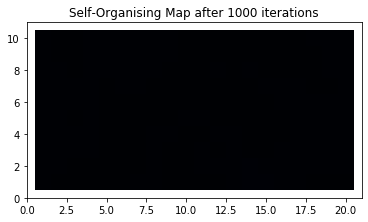

In [10]:
print(net.shape)
fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.shape[0]+1))
ax.set_ylim((0, net.shape[1]+1))
ax.set_title('Self-Organising Map after %d iterations' % n_iterations)

# plot
for x in range(1, net.shape[0] + 1):
    for y in range(1, net.shape[1] + 1):
#         print('net: ', net[x-1,y-1,:])
        element = net[x-1,y-1,:]
#         print(element[0:4])
        aux_r = np.average(element[0:4])
        aux_g = np.average(element[4:8])
        aux_b = np.average(element[8:])
#         print(aux_r, aux_g, aux_b)
#         aux = np.sum(element)
#         print(aux_r)
#         print(aux_g)
#         print(aux_b)
        
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1, facecolor = [aux_r,aux_g,aux_b], edgecolor='none'))
#         ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1, color = [(aux_r,aux_g,aux_b)]
#                      facecolor=[aux_r, aux_g, aux_b]))
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [12]:
# X     = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
kmeans.cluster_centers_

array([[1.18643294e-03, 2.29768245e-04, 2.20962312e-04, 1.82512206e-03,
        9.50596737e-03, 1.93715720e-04, 1.45349690e-04, 3.56381277e-05,
        1.37949746e-04, 5.18469639e-04, 8.11122603e-05, 2.17055142e-04,
        6.68318494e-02],
       [1.26668831e-03, 1.72819854e-04, 2.22623678e-04, 1.56205564e-03,
        9.68158220e-03, 2.63095386e-04, 2.76585955e-04, 2.61806851e-05,
        1.75299307e-04, 5.23262283e-04, 9.89438568e-05, 2.85742362e-04,
        1.09666029e-01],
       [1.14852056e-03, 2.28866309e-04, 2.09995810e-04, 1.91072117e-03,
        8.47377178e-03, 1.90008241e-04, 1.61350083e-04, 3.57994250e-05,
        1.33223863e-04, 3.75016264e-04, 8.63601286e-05, 2.28547147e-04,
        4.20470364e-02]])

In [13]:
list_1 = []
list_2 = []
list_3 = []

clusters = kmeans.cluster_centers_
# print(len(clusters))
for x in range(net.shape[0]):
    for y in range(net.shape[1]):
        minimo  = np.inf
        idx_min = 9
        for idx, center in enumerate(clusters):            
            aux = ((net[x, y, :] - center)** 2)
#             print('net[x, y, :]: ', net[x, y, :])
#             print('center: ', center)
#             print(aux)
            w_dist = np.sqrt(np.sum(aux))
            if w_dist < minimo:
                minimo  = w_dist
                idx_min = idx
        
#         print('minimo: ', minimo)
#         print('idx_min: ', idx_min)
        if idx_min == 0:
            list_1.append(net[x, y, :])
        elif idx_min == 1:
            list_2.append(net[x, y, :])
        elif idx_min == 2:
            list_2.append(net[x, y, :])

print('*'*50)
print(len(list_1))
print('*'*50)
print(len(list_2))
print('*'*50)
print(len(list_3))
            

**************************************************
106
**************************************************
94
**************************************************
0
